In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Se cargan las librerias a usar y se define un diseño para las graficas usadas.
A continuacion se describe para que se uso cada una en el Proyecto:
1. Pandas (import pandas as pd)
Pandas es la librería principal para la manipulación y análisis de datos estructurados. Permite cargar archivos CSV, explorar el contenido del dataset, filtrar columnas, agrupar información y transformar datos de forma eficiente. En este proyecto se usa para cargar el dataset de vinos (read_csv), explorar datos (head, info, describe), y filtrar variables según su tipo.

2. NumPy (import numpy as np)
NumPy proporciona soporte para operaciones numéricas de alto rendimiento y manejo de arreglos multidimensionales. En este proyecto se utiliza indirectamente a través de Pandas y de forma explícita para identificar columnas numéricas (select_dtypes) y trabajar con estructuras de datos de tipo numérico.

3. Matplotlib (import matplotlib.pyplot as plt)
Matplotlib es la biblioteca base para la generación de gráficos en Python. En el análisis se emplea para crear histogramas, gráficos de barras y ajustar la visualización general de las figuras (tamaño, títulos, etiquetas), complementando a Seaborn.

4. Seaborn (import seaborn as sns)
Seaborn es una librería construida sobre Matplotlib que simplifica la creación de visualizaciones estadísticas atractivas. Se usa intensamente en este proyecto para mostrar:

La distribución de la variable objetivo (countplot).

Histogramas de variables numéricas (histplot).

Gráficos de barras para variables categóricas (barplot).

**CARGA DATASET**

In [ ]:
# Carga del dataset
df_wine_original = pd.read_csv('wines_SPA.csv', na_values=['NA', ''])

print("Dataset cargado correctamente.\n")
print(df_wine_original.head())
print(f"Dimensiones: {df_wine_original.shape[0]} filas y {df_wine_original.shape[1]} columnas.")

# Copia del dataset para trabajar
df_wine = df_wine_original.copy()


Dataset cargado correctamente.

          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  
Dimensiones: 7500 filas y 11 columnas.


En esta sección se realiza la carga del dataset desde el archivo CSV proporcionado. Se muestra un resumen inicial con las primeras filas del DataFrame para validar que los datos fueron leídos correctamente. Además, se imprime la dimensión del conjunto de datos para tener una idea del tamaño del mismo. También se crea una copia de seguridad del dataset original para futuras transformaciones o análisis sin alterar los datos fuente.

**ANALISIS DE DATOS**

In [ ]:
# Información general
print("\n Información general:")
df_wine.info()

# Descripción estadística
print("\n Estadísticas descriptivas:")
print(df_wine.describe(include='all'))

#Datos Faltantes
print("\n Datos faltantes:")
print(df_wine.isnull().sum())



 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB

 Estadísticas descriptivas:
         winery     wine  year       rating   num_reviews country region  \
count      7500     7500  7498  7500.000000   7500.000000    7500   7500   
unique      480      847    71          NaN           NaN       1     76   
top

Aquí se explora la estructura general del dataset. Se identifica el tipo de datos en cada columna, la presencia de valores nulos y se visualizan estadísticas descriptivas básicas como el promedio, la mediana y los valores mínimos y máximos.


In [ ]:
target_col = 'rating'
numerical_cols = df_wine.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_wine.select_dtypes(include='object').columns.tolist()

eda_numerical_cols = [col for col in numerical_cols if col != target_col]

print(f"\n Variables numéricas (sin rating): {eda_numerical_cols}")
print(f" Variables categóricas: {categorical_cols}")



 Variables numéricas (sin rating): ['num_reviews', 'price', 'body', 'acidity']
 Variables categóricas: ['winery', 'wine', 'year', 'country', 'region', 'type']


En esta etapa se clasifican las variables del dataset en numéricas y categóricas. Esta distinción es importante para aplicar técnicas de análisis adecuadas según el tipo de dato. Además, se identifica la variable objetivo (rating), que será el foco principal del análisis y de los posibles modelos predictivos.


Análisis de la variable objetivo: 'rating'
Valores únicos en 'rating': [np.float64(4.2), np.float64(4.3), np.float64(4.4), np.float64(4.5), np.float64(4.6), np.float64(4.7), np.float64(4.8), np.float64(4.9)]

Distribución de la variable objetivo 'rating':
rating
4.2    0.757200
4.3    0.094267
4.4    0.064533
4.5    0.037467
4.6    0.025467
4.7    0.014933
4.8    0.005867
4.9    0.000267
Name: proportion, dtype: float64


<ipython-input-31-9037859870cf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


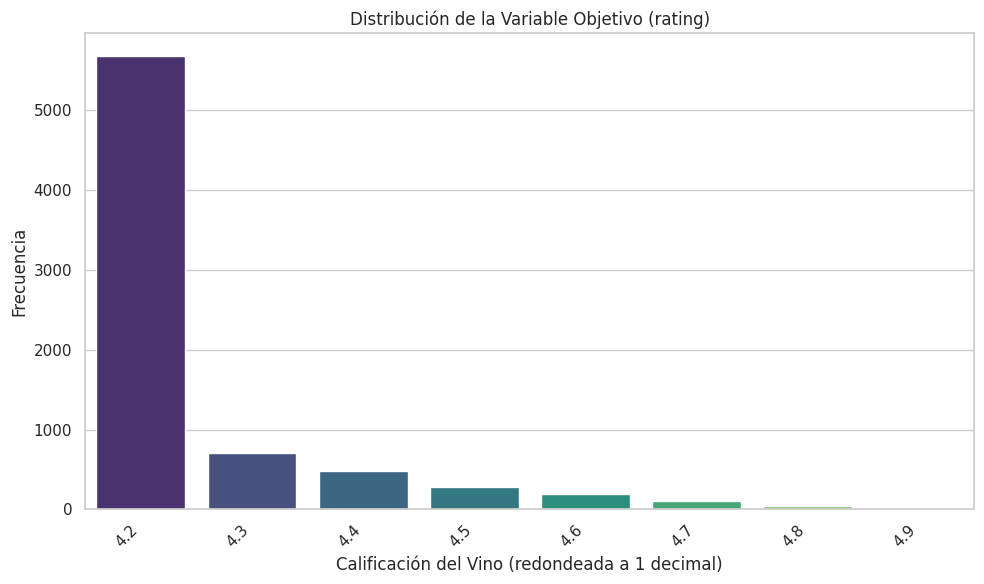

In [ ]:
# Se analiza la variable objetivo que representa la calificación del vino.
print(f"\nAnálisis de la variable objetivo: '{target_col}'")

# Muestra los valores únicos de calificación (sin nulos), ordenados.
print(f"Valores únicos en '{target_col}': {sorted(df_wine[target_col].dropna().unique())}")

# Muestra la distribución (frecuencia relativa) de cada calificación
print(f"\nDistribución de la variable objetivo '{target_col}':")
print(df_wine[target_col].value_counts(normalize=True).sort_index())

# Visualización de la distribución de calificaciones con gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(
    x=df_wine[target_col].round(1),  # Se redondean los valores para agrupar mejor
    palette='viridis',
    order=sorted(df_wine[target_col].dropna().round(1).unique())  # Ordenar valores únicos
)
plt.title(f'Distribución de la Variable Objetivo ({target_col})')
plt.xlabel('Calificación del Vino (redondeada a 1 decimal)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Se realiza un análisis detallado de la variable rating, observando los valores únicos y su distribución de frecuencias. También se representa gráficamente esta distribución mediante un gráfico de barras para entender la concentración de calificaciones. IMPORTANTE PARA TENERLO EN CUENTA A LA HORA DE DEFINIR EL PARAMETRO DE UN VINO DE CALIDAD



Análisis de variables categóricas (Las 10 categorías más frecuentes):

Variable: winery (Total valores únicos: 480)
winery
Contino               457
Artadi                261
La Rioja Alta         254
Sierra Cantabria      237
Matarromera           232
Vina Pedrosa          230
Imperial              228
Losada                227
Ramon Bilbao          225
Portal del Priorat    225
Name: count, dtype: int64


<ipython-input-32-d9040736e597>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


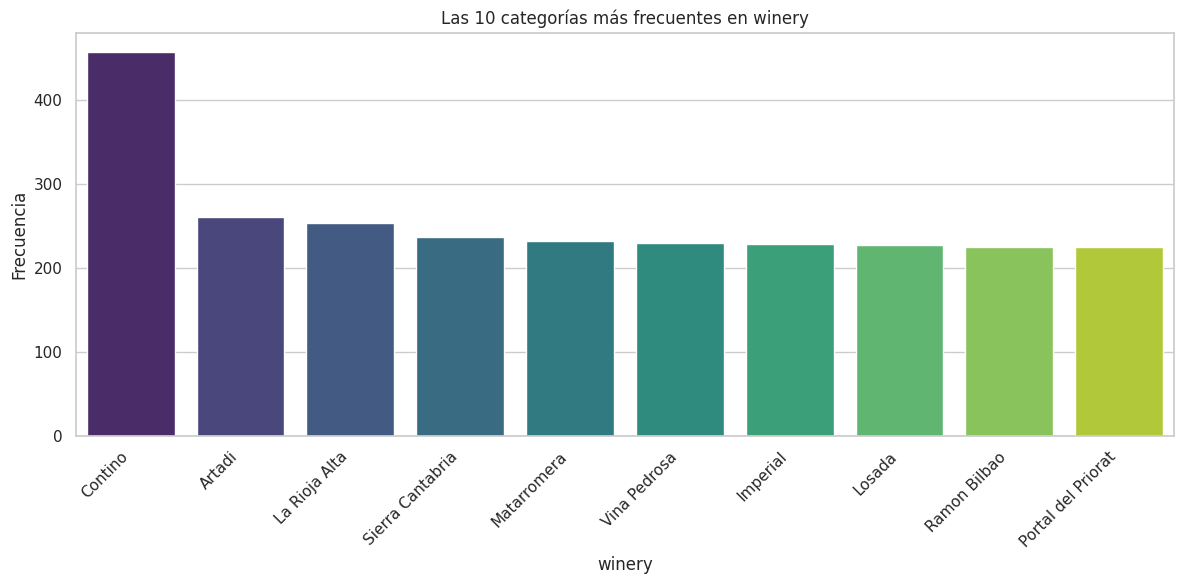

Advertencia: La variable 'winery' tiene alta cardinalidad (480 valores únicos).

Variable: wine (Total valores únicos: 847)
wine
Reserva                  467
Gran Reserva             458
Rioja Reserva            240
El Viejo                 224
Valdegines               223
Mirto                    223
Corimbo I                223
Rioja Graciano           223
Coleccion Privada        222
Clos del Portal Somni    222
Name: count, dtype: int64


<ipython-input-32-d9040736e597>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


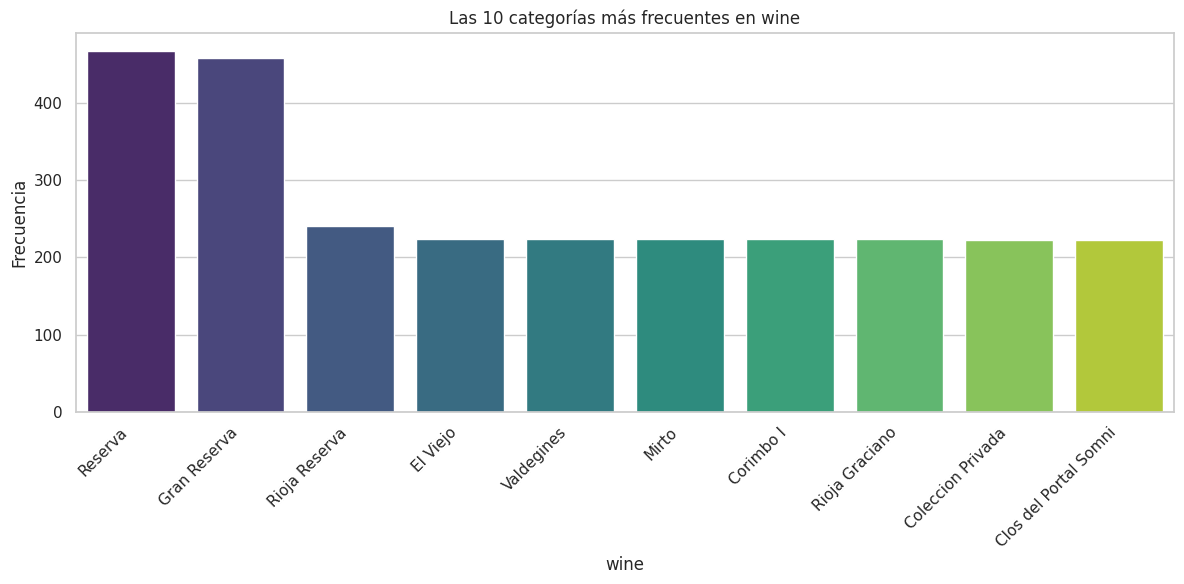

Advertencia: La variable 'wine' tiene alta cardinalidad (847 valores únicos).

Variable: year (Total valores únicos: 71)
year
2011    1190
2016     897
2015     860
2018     850
2017     731
2012     528
2020     474
2014     376
2019     331
N.V.     288
Name: count, dtype: int64


<ipython-input-32-d9040736e597>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


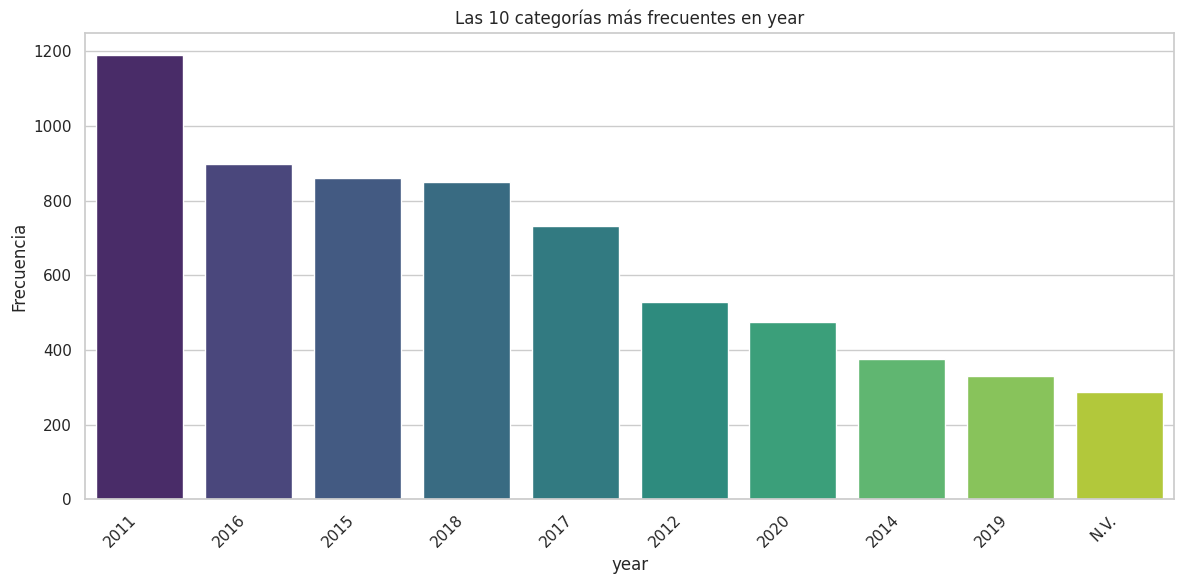

Advertencia: La variable 'year' tiene alta cardinalidad (71 valores únicos).

Variable: country
La columna 'country' solo tiene un valor único: Espana

Variable: region (Total valores únicos: 76)
region
Rioja                 2440
Ribera del Duero      1413
Priorato               686
Toro                   300
Vino de Espana         263
Rias Baixas            252
Jerez-Xeres-Sherry     247
Bierzo                 244
Mallorca               237
Alicante               233
Name: count, dtype: int64


<ipython-input-32-d9040736e597>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


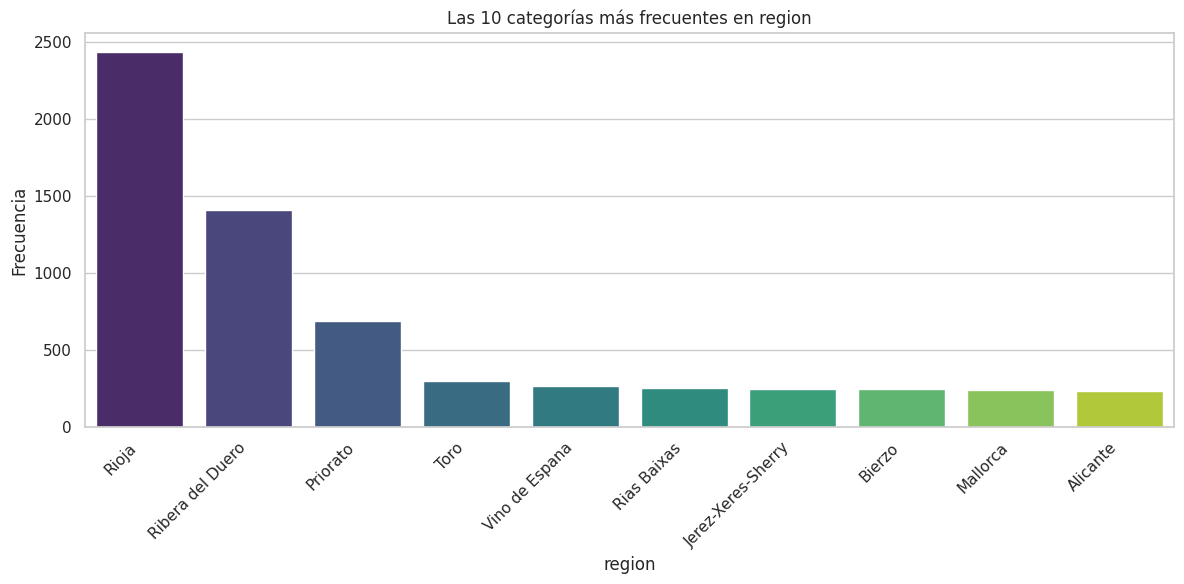

Advertencia: La variable 'region' tiene alta cardinalidad (76 valores únicos).

Variable: type (Total valores únicos: 21)
type
Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
NaN                      545
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Name: count, dtype: int64


<ipython-input-32-d9040736e597>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


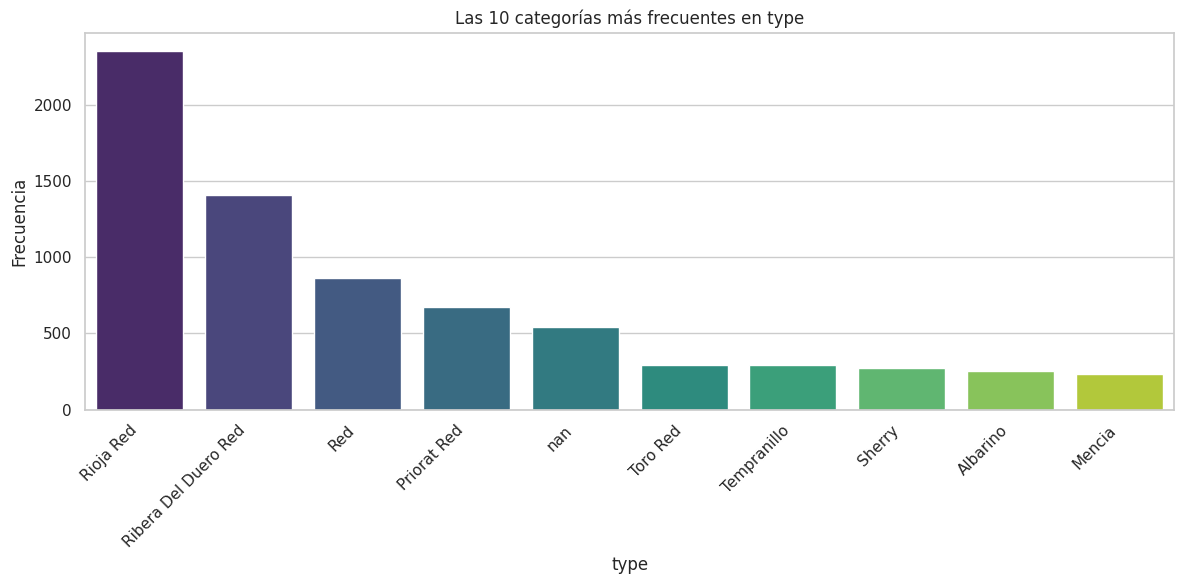

In [ ]:
print("\nAnálisis de variables categóricas (Las 10 categorías más frecuentes):")

for col in categorical_cols:
    # Se omite análisis si una columna tiene un solo valor (como 'country')
    if col == 'country' and df_wine[col].nunique(dropna=False) == 1:
        print(f"\nVariable: {col}")
        print(f"La columna '{col}' solo tiene un valor único: {df_wine[col].mode()[0]}")
        continue

    print(f"\nVariable: {col} (Total valores únicos: {df_wine[col].nunique()})")

    # Selecciona las 10 categorías más frecuentes (incluyendo NaN si aplica)
    top_categories = df_wine[col].value_counts(dropna=False).nlargest(10)

    print(top_categories)

    # Visualiza las categorías más comunes con gráfico de barras
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_categories.index.astype(str),
        y=top_categories.values,
        palette='viridis',
        order=top_categories.index.astype(str)
    )
    plt.title(f'Las 10 categorías más frecuentes en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Advertencia si hay demasiadas categorías (alta cardinalidad)
    if df_wine[col].nunique() > 50:
        print(f"Advertencia: La variable '{col}' tiene alta cardinalidad ({df_wine[col].nunique()} valores únicos).")



En este punto se revisan las variables categóricas, mostrando las 10 categorías más frecuentes para cada una de ellas. Se incluye también una advertencia cuando alguna columna presenta una alta cardinalidad, que nos ayuda para saber que variables tener en cuenta para el modelo.


Matriz de Correlación de variables numéricas (incluyendo target):


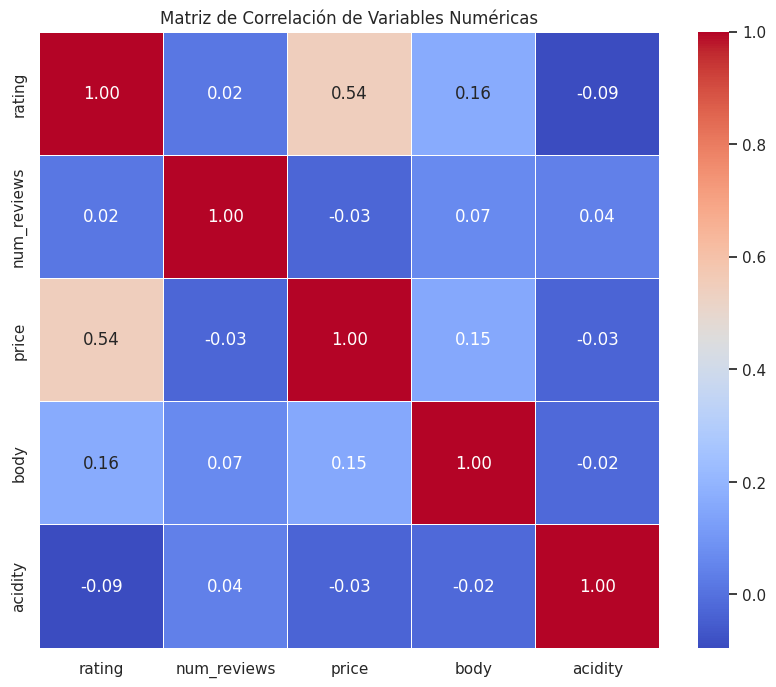

In [ ]:
print("\nMatriz de Correlación de variables numéricas (incluyendo target):")

# Selecciona solo columnas numéricas del dataset
numeric_df_for_corr = df_wine[numerical_cols].copy()

# Calcula la matriz de correlación entre variables numéricas
correlation_matrix = numeric_df_for_corr.corr()

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [ ]:
def analisis_avanzado_vino(df):
    """
    Realiza un análisis exploratorio por:
    - Año (rating promedio)
    - Región (precio promedio)
    - Tipo de vino (cuerpo promedio)
    """
    #  Análisis del rating promedio por año
    print("\n Rating promedio por año:")
    ratings_por_anio = df.groupby('year')['rating'].mean().sort_index()

    for year, rating in ratings_por_anio.items():
        print(f"Año {year}: Rating promedio = {rating:.2f}")

     # Visualiza el rating promedio por año en un gráfico de línea
    ratings_por_anio.plot(kind='line', marker='o')
    plt.title('Rating Promedio por Año')
    plt.xlabel('Año')
    plt.ylabel('Rating Promedio')
    plt.grid()
    plt.show()

    #  Análisis del precio promedio por región (Top 10)
    print("\n Precio promedio por región (Top 10):")
    precio_region = df.groupby('region')['price'].mean().sort_values(ascending=False).head(10)
    for region, precio in precio_region.items():
        print(f"Región {region}: Precio promedio = €{precio:.2f}")

    precio_region.plot(kind='bar', color='teal')
    plt.title('Top 10 Regiones con Mayor Precio Promedio')
    plt.ylabel('Precio (€)')
    plt.xticks(rotation=45)
    plt.show()

    #  Análisis del cuerpo del vino por tipo
    print("\n Promedio del cuerpo por tipo de vino:")
    cuerpo_tipo = df.groupby('type')['body'].mean().sort_values(ascending=False)
    for tipo, body in cuerpo_tipo.items():
        print(f"Tipo {tipo}: Cuerpo promedio = {body:.2f}")

    cuerpo_tipo.plot(kind='bar', color='darkred')
    plt.title('Cuerpo Promedio por Tipo de Vino')
    plt.ylabel('Cuerpo')
    plt.xticks(rotation=45)
    plt.show()



 Rating promedio por año:
Año 1910: Rating promedio = 4.60
Año 1922: Rating promedio = 4.40
Año 1925: Rating promedio = 4.30
Año 1928: Rating promedio = 4.50
Año 1929: Rating promedio = 4.80
Año 1931: Rating promedio = 4.80
Año 1942: Rating promedio = 4.70
Año 1946: Rating promedio = 4.80
Año 1949: Rating promedio = 4.50
Año 1951: Rating promedio = 4.50
Año 1953: Rating promedio = 4.70
Año 1954: Rating promedio = 4.60
Año 1955: Rating promedio = 4.70
Año 1958: Rating promedio = 4.70
Año 1959: Rating promedio = 4.35
Año 1961: Rating promedio = 4.60
Año 1962: Rating promedio = 4.70
Año 1964: Rating promedio = 4.37
Año 1965: Rating promedio = 4.60
Año 1967: Rating promedio = 4.60
Año 1968: Rating promedio = 4.48
Año 1969: Rating promedio = 4.50
Año 1970: Rating promedio = 4.42
Año 1972: Rating promedio = 4.70
Año 1973: Rating promedio = 4.50
Año 1974: Rating promedio = 4.70
Año 1975: Rating promedio = 4.55
Año 1976: Rating promedio = 4.50
Año 1978: Rating promedio = 4.40
Año 1979: Rating

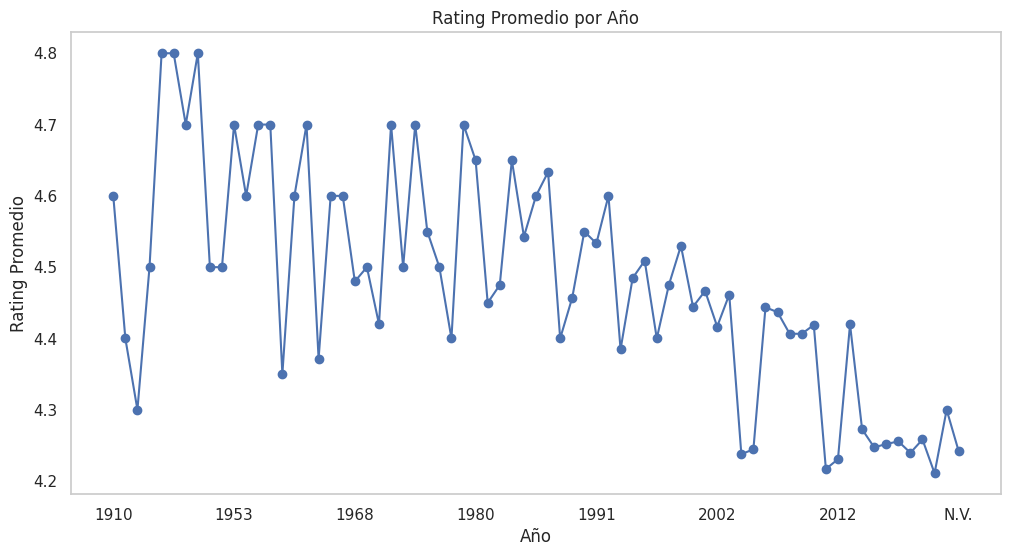


 Precio promedio por región (Top 10):
Región Montilla-Moriles: Precio promedio = €178.69
Región Conca de Barbera: Precio promedio = €164.54
Región Jerez Palo Cortado: Precio promedio = €144.48
Región Mentrida: Precio promedio = €121.99
Región Ribera del Duero: Precio promedio = €109.23
Región Aragon: Precio promedio = €108.51
Región Priorato: Precio promedio = €104.09
Región Dominio de Valdepusa: Precio promedio = €99.87
Región Jumilla: Precio promedio = €80.58
Región Arinzano: Precio promedio = €76.99


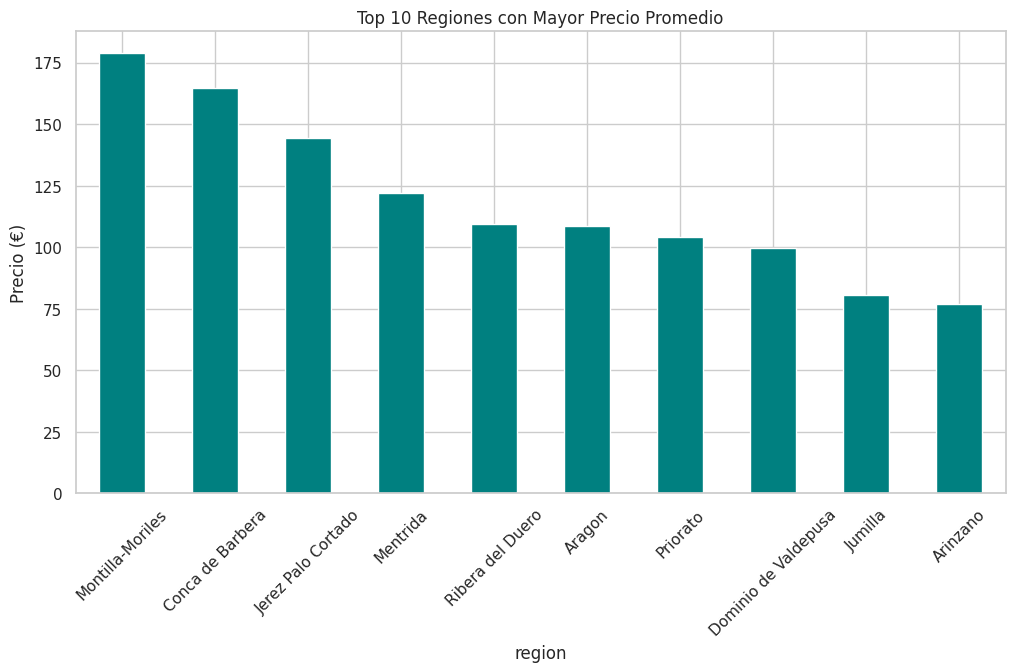


 Promedio del cuerpo por tipo de vino:
Tipo Grenache: Cuerpo promedio = 5.00
Tipo Toro Red: Cuerpo promedio = 5.00
Tipo Ribera Del Duero Red: Cuerpo promedio = 5.00
Tipo Pedro Ximenez: Cuerpo promedio = 5.00
Tipo Monastrell: Cuerpo promedio = 5.00
Tipo Syrah: Cuerpo promedio = 4.00
Tipo Sherry: Cuerpo promedio = 4.00
Tipo Cabernet Sauvignon: Cuerpo promedio = 4.00
Tipo Chardonnay: Cuerpo promedio = 4.00
Tipo Red: Cuerpo promedio = 4.00
Tipo Priorat Red: Cuerpo promedio = 4.00
Tipo Rioja Red: Cuerpo promedio = 4.00
Tipo Montsant Red: Cuerpo promedio = 4.00
Tipo Tempranillo: Cuerpo promedio = 4.00
Tipo Albarino: Cuerpo promedio = 3.00
Tipo Rioja White: Cuerpo promedio = 3.00
Tipo Mencia: Cuerpo promedio = 3.00
Tipo Verdejo: Cuerpo promedio = 3.00
Tipo Sauvignon Blanc: Cuerpo promedio = 3.00
Tipo Cava: Cuerpo promedio = 2.00
Tipo Sparkling: Cuerpo promedio = 2.00


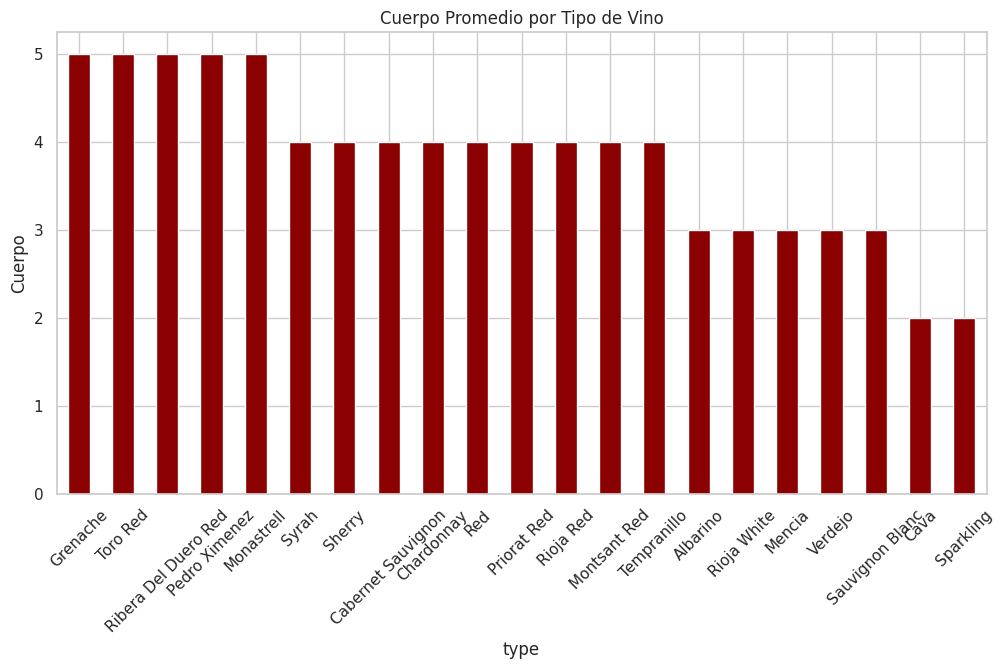

In [ ]:
analisis_avanzado_vino(df_wine)

Este análisis adicional está encapsulado en la función analisis_avanzado_vino(df) y permite explorar cómo varía la calidad del vino (rating), el precio y el cuerpo del vino según otras variables como el año, la región y el tipo. Utiliza bucles y groupby para calcular promedios por grupo y visualiza los resultados en gráficos. Esta función ofrece una visión más específica y comparativa entre categorías clave del dataset.


--- Punto 9: Resumen Automatizado de Variables Numéricas ---

Resumen de la variable: num_reviews
Valores faltantes: 0
Media: 451.11
Mediana: 404.00
Desviación estándar: 723.00
Valor mínimo: 25.00
Valor máximo: 32624.00


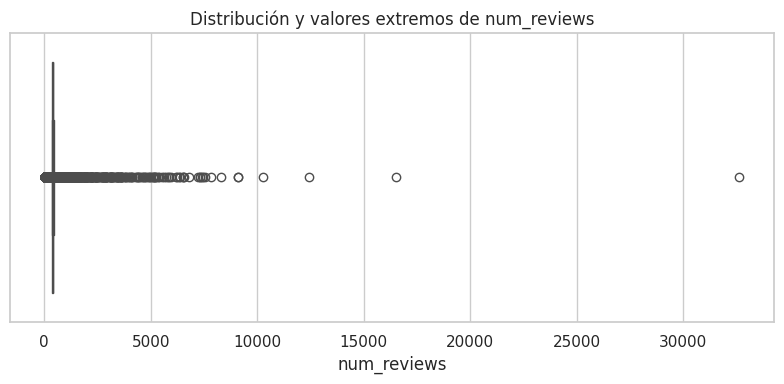


Resumen de la variable: price
Valores faltantes: 0
Media: 60.10
Mediana: 28.53
Desviación estándar: 150.36
Valor mínimo: 4.99
Valor máximo: 3119.08


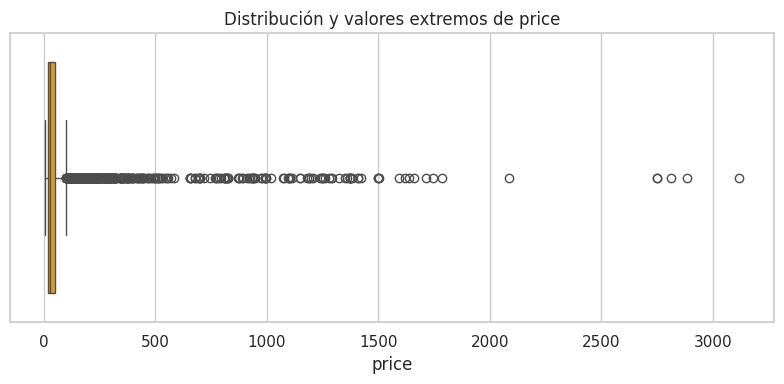


Resumen de la variable: body
Valores faltantes: 1169
Media: 4.16
Mediana: 4.00
Desviación estándar: 0.58
Valor mínimo: 2.00
Valor máximo: 5.00


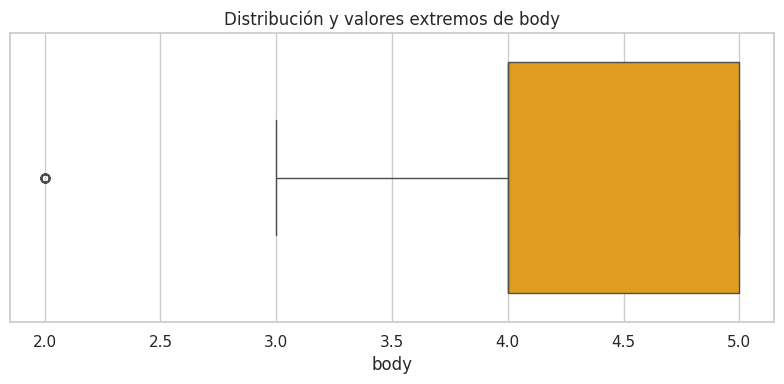


Resumen de la variable: acidity
Valores faltantes: 1169
Media: 2.95
Mediana: 3.00
Desviación estándar: 0.25
Valor mínimo: 1.00
Valor máximo: 3.00


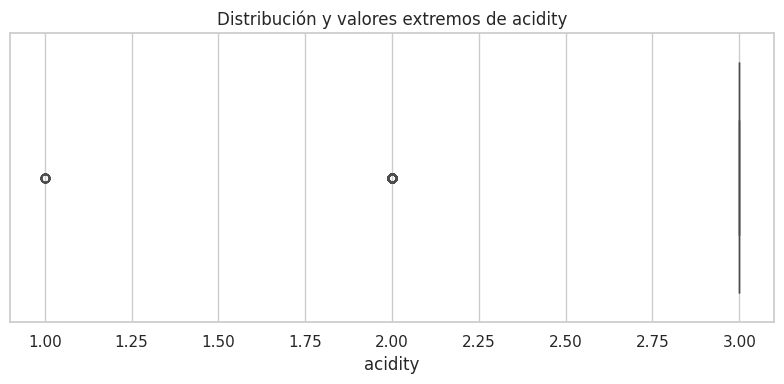

In [ ]:
def resumen_variable_numerica(df, columnas):
    print("\n--- Punto 9: Resumen Automatizado de Variables Numéricas ---")
    for col in columnas:
        print(f"\nResumen de la variable: {col}")
        print(f"Valores faltantes: {df[col].isnull().sum()}")
        print(f"Media: {df[col].mean():.2f}")
        print(f"Mediana: {df[col].median():.2f}")
        print(f"Desviación estándar: {df[col].std():.2f}")
        print(f"Valor mínimo: {df[col].min():.2f}")
        print(f"Valor máximo: {df[col].max():.2f}")

        # Visualiza distribución
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], color='orange')
        plt.title(f'Distribución y valores extremos de {col}')
        plt.tight_layout()
        plt.show()

# Llamado de la función con las columnas numéricas
resumen_variable_numerica(df_wine, eda_numerical_cols)


**PREPROCESAMIENTO DE LOS DATOS**

In [ ]:
# Imputar 'type' con la moda (valor más frecuente)
mode_type = df_wine['type'].mode()[0]
df_wine['type'].fillna(mode_type, inplace=True)
print(f"'type' imputado con la moda global: {mode_type}")


'type' imputado con la moda global: Rioja Red


<ipython-input-37-9d927e1f65b4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wine['type'].fillna(mode_type, inplace=True)


In [ ]:
# Imputar columnas numéricas con la mediana
num_cols_to_impute = ['body', 'acidity']
for col in num_cols_to_impute:
    median_val = df_wine[col].median()
    df_wine[col].fillna(df_wine[col].median(),inplace=True)

    print(f"'{col}' imputado con la mediana: {median_val}")


'body' imputado con la mediana: 4.0
'acidity' imputado con la mediana: 3.0


<ipython-input-38-355c5e9bab60>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wine[col].fillna(df_wine[col].median(),inplace=True)


In [ ]:
# Imputar 'year' con la moda
mode_year = df_wine['year'].mode()[0]
df_wine['year'].fillna(mode_year, inplace=True)
print(f"'year' imputado con la moda: {mode_year}")


'year' imputado con la moda: 2011


<ipython-input-39-6443f4d1589e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wine['year'].fillna(mode_year, inplace=True)


In [ ]:
def winsorize_column(df, column, lower_percentile=0.05, upper_percentile=0.95):
      lower = df[column].quantile(lower_percentile)
      upper = df[column].quantile(upper_percentile)
      df[column] = df[column].clip(lower=lower, upper=upper)
      return df

def winsorize_dataframe(df, columnas, lower_percentile=0.05, upper_percentile=0.95):
      df_winsor = df.copy()
      for col in columnas:
        df_winsor = winsorize_column(df_winsor, col, lower_percentile, upper_percentile)
      return df_winsor

columnas_numericas = ['num_reviews', 'price', 'body', 'acidity']
df_wine = winsorize_dataframe(df_wine, columnas_numericas)



In [ ]:
print("Verificación final de valores faltantes:")
print(df_wine.isnull().sum())
print(df_wine.head())


Verificación final de valores faltantes:
winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64
          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9         58.0  Espana   
1         Artadi  Vina El Pison  2018     4.9         45.0  Espana   
2   Vega Sicilia          Unico  2009     4.8        693.1  Espana   
3   Vega Sicilia          Unico  1999     4.8        693.1  Espana   
4   Vega Sicilia          Unico  1996     4.8        693.1  Espana   

             region   price                  type  body  acidity  
0              Toro  150.13              Toro Red   5.0      3.0  
1    Vino de Espana  150.13           Tempranillo   4.0      3.0  
2  Ribera del Duero  150.13  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  150.13  Ribera Del Duero Red   5.0      3.0  
4  

In [ ]:
# Eliminar columnas irrelevantes
df_wine = df_wine.drop(columns=['winery', 'wine','country'])

# Convertir 'year' a numérico
df_wine['year'] = pd.to_numeric(df_wine['year'], errors='coerce')

# Eliminar filas con year faltante
df_wine = df_wine.dropna(subset=['year'])

# Codificar variables categóricas
# Se asegura de que las columnas categóricas sean strings antes de aplicar get_dummies
df_wine[['region', 'type']] = df_wine[['region', 'type']].astype(str)

# Aplicar one-hot encoding a todas las categóricas
df_wine_dummies = pd.get_dummies(df_wine, columns=['region', 'type'], drop_first=True)

print(df_wine_dummies.select_dtypes(include='object').columns)



Index([], dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear una copia para el modelo
df_model = df_wine_dummies.copy()
#se crea una clase con el paramatro de que si el vino es mayor o igual a 4.3 es un vino de calidad
#y se pone 1 de lo contrario 0
df_model['class'] = df_model['rating'].apply(lambda x: 1 if x >= 4.3 else 0)
# Mostrar algunas filas para verificar
print(df_model.head())


     year  rating  num_reviews   price  body  acidity  region_Alella  \
0  2013.0     4.9         58.0  150.13   5.0      3.0          False   
1  2018.0     4.9         45.0  150.13   4.0      3.0          False   
2  2009.0     4.8        693.1  150.13   5.0      3.0          False   
3  1999.0     4.8        693.1  150.13   5.0      3.0          False   
4  1996.0     4.8        693.1  150.13   5.0      3.0          False   

   region_Alicante  region_Almansa  region_Andalucia  ...  type_Rioja Red  \
0            False           False             False  ...           False   
1            False           False             False  ...           False   
2            False           False             False  ...           False   
3            False           False             False  ...           False   
4            False           False             False  ...           False   

   type_Rioja White  type_Sauvignon Blanc  type_Sherry  type_Sparkling  \
0             False           

**Particion de Modelo**

In [ ]:
from sklearn.model_selection import train_test_split
#Variable objetivo desde el dataframe procesado
y = df_model['class']

#Variables predictoras desde el dataframe procesado sin class
X = df_model.drop(['class'], axis=1)
#se normaliza los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

#Verificaciones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (5769, 97)
Tamaño del conjunto de prueba: (1443, 97)


**Modelos**

**Perceptrón**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential([
Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6846 - loss: 0.6439 - val_accuracy: 0.7464 - val_loss: 0.5622
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7717 - loss: 0.5360 - val_accuracy: 0.7471 - val_loss: 0.5123
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7701 - loss: 0.4898 - val_accuracy: 0.7512 - val_loss: 0.4811
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7712 - loss: 0.4652 - val_accuracy: 0.7574 - val_loss: 0.4557
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7813 - loss: 0.4401 - val_accuracy: 0.7782 - val_loss: 0.4336
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.4202 - val_accuracy: 0.7983 - val_loss: 0.4134
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8174 - loss: 0.3971 - val_accuracy: 0.8143 - val_loss: 0.3954
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8246 - loss: 0.3879 - val_accuracy: 0.

**Una capa oculta con un numero de neuronas igual al número de entradas**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2 = Sequential([
Dense(X_train.shape[1], activation='sigmoid', input_shape=(X_train.shape[1],)),
Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7625 - loss: 0.5289 - val_accuracy: 0.7713 - val_loss: 0.4558
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7956 - loss: 0.4257 - val_accuracy: 0.8649 - val_loss: 0.3588
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8679 - loss: 0.3357 - val_accuracy: 0.8995 - val_loss: 0.2792
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9109 - loss: 0.2641 - val_accuracy: 0.9258 - val_loss: 0.2266
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9332 - loss: 0.2229 - val_accuracy: 0.9362 - val_loss: 0.1937
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9423 - loss: 0.1913 - val_accuracy: 0.9425 - val_loss: 0.1725
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9498 - loss: 0.1665 - val_accuracy: 0.9584 - val_loss: 0.1512
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9559 - loss: 0.1558 - val_accuracy: 0.

**3 capas oculta con 3 neuronas en cada capa oculta.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model3 = Sequential([
Dense(3, activation='sigmoid', input_shape=(X_train.shape[1],)),
Dense(3, activation='sigmoid'),
Dense(3, activation='sigmoid'),
Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))





Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7517 - loss: 0.5603 - val_accuracy: 0.7401 - val_loss: 0.5729
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7483 - loss: 0.5632 - val_accuracy: 0.7401 - val_loss: 0.5720
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7611 - loss: 0.5469 - val_accuracy: 0.7401 - val_loss: 0.5684
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7703 - loss: 0.5333 - val_accuracy: 0.7401 - val_loss: 0.5625
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7498 - loss: 0.5510 - val_accuracy: 0.7401 - val_loss: 0.5534
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7597 - loss: 0.5293 - val_accuracy: 0.7401 - val_loss: 0.5366
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7558 - loss: 0.5158 - val_accuracy: 0.7401 - val_loss: 0.5117
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7521 - loss: 0.4921 - val_accuracy: 0.

**Evaluacion de Modelos**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluar_modelo_binario(modelo, X_test, y_test, nombre_modelo="Modelo"):
  # Obtener predicciones probabilísticas
    y_prob = modelo.predict(X_test)

    # Convertir probabilidades en etiquetas binarias (umbral 0.5)
    y_pred = (y_prob > 0.5).astype(int).flatten()

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Imprimir resultados
    print(f" Resultados de evaluación para {nombre_modelo}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("-" * 40)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 Resultados de evaluación para Modelo 1: Perceptrón
Accuracy : 0.9494
Precisión: 1.0000
Recall   : 0.8053
F1-score : 0.8922
----------------------------------------


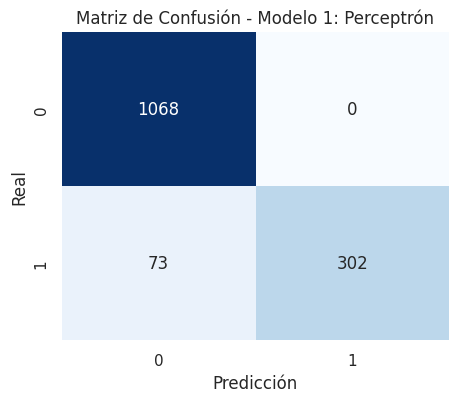

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 Resultados de evaluación para Modelo 2: 1 capa oculta (n = entradas)
Accuracy : 0.9993
Precisión: 0.9973
Recall   : 1.0000
F1-score : 0.9987
----------------------------------------


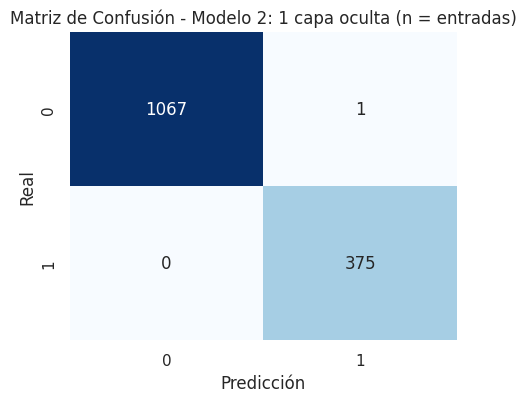

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 Resultados de evaluación para Modelo 3: 3 capas ocultas (3 neuronas c/u)
Accuracy : 0.9986
Precisión: 0.9947
Recall   : 1.0000
F1-score : 0.9973
----------------------------------------


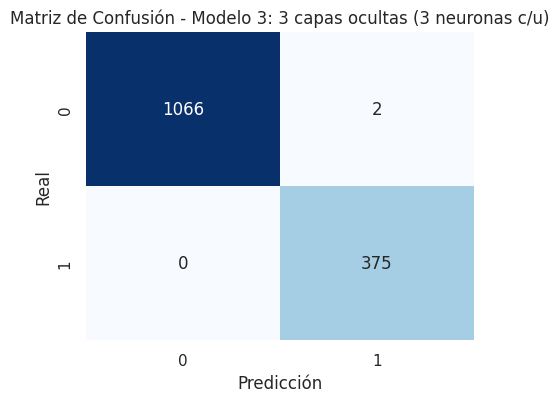

In [ ]:
evaluar_modelo_binario(model1, X_test, y_test, "Modelo 1: Perceptrón")
evaluar_modelo_binario(model2, X_test, y_test, "Modelo 2: 1 capa oculta (n = entradas)")
evaluar_modelo_binario(model3, X_test, y_test, "Modelo 3: 3 capas ocultas (3 neuronas c/u)")